In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset # Network Common Data Form
import sys

# The lines below run the following Jupyter Notebooks to use the code
# in those scripts without cluttering the current main script
%run PRECTImportData.ipynb
%run PRECTAlignDatasets.ipynb
%run PRECTInterpolateDataset.ipynb

In [2]:
# ************************************************************************************************
# *************************** USER INPUTS ARE REQUIRED IN THIS CELL ******************************
# ************************************************************************************************


#### Select the date to be analyzed as a value representing the number of days since 2009-09-01 ####
dayOfTheSeason = 185 # For reference: 174 is February 22 and 122 is January 1

#### Select the number of days to be time averaged ####
numDayAvg = 2


#### Select which day hindcast should be used ####
DayXXHcast = [5,10,15,20]  # Must be a list of integer(s) from >=1 and <=20

# Choose region of interest 
lats = -20
latn =  20
lonw = -130 # *** For longitudes west of the Prime Meridian, enter a negative number ***
lone = -90  

# ************************************************************************************************

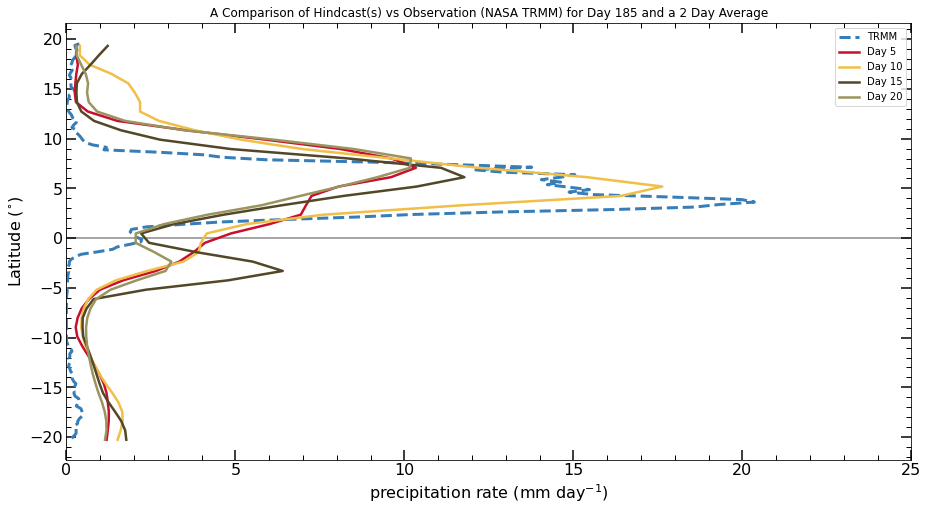

In [3]:
###########################################################################################
####################### Plot a comparison between hindcasts ###############################
###########################################################################################

# Pack coordinates into list that is more easily exported into the PRECTAlignDatasets function
userInputs = [dayOfTheSeason,lats,latn,lonw,lone]

# Setup the figure
fig = plt.figure(figsize=(13, 7.2), tight_layout='true')
plt.minorticks_on()
ax=fig.add_axes()
plt.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', top='True')
plt.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', top='True')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
plt.axvline(0, color='0.65', linewidth = 2.0, zorder=-2)
plt.ylabel('Latitude $(^{\circ})$', fontsize=16)
plt.xlabel('precipitation rate (mm day$^{-1}$)', fontsize=16)
plt.title("A Comparison of Hindcast(s) vs Observation (NASA TRMM) for Day "+str(dayOfTheSeason)+" and a "+str(numDayAvg)+" Day Average")
plt.xlim([0,25])
plotColors = ['#C8102E','#F1BE48','#524727','#9B945F','#CAC7A7'] # Go Cyclones! :)
plotLegend = []
plotLegend.append('TRMM')

# Loop through the DayXXHcast list to overlay multiple days of forecasts
for ii,DayXX in enumerate(DayXXHcast):
        
    # Ensure that the user is requesting a day that is within the hindcast dataset.
    # numDayAvg is subtracted by 1 so as to not double count dayOfTheSeason in the numDayAvg period
    if dayOfTheSeason < min(timeDayXX[DayXX]) or dayOfTheSeason+(numDayAvg-1) > max(timeDayXX[DayXX]):
        sys.exit("The user is attempting to access data that is not within the time bounds of the hindcast dataset")
    
    # Use the PRECTAlignDatasets function to obtain the aligned datasets
    precip_aligned, precip_aligned_obs, lat_plt, lat_plt_obs, id_DayOfTheSeason = PRECTAlignDatasets(timeDayXX[DayXX], lat, lon, precipDayXX[DayXX], rootgrp_obs, userInputs)
    
    # Average the precip data over the specified numDayAvg time period (axis=0)      
    precip_avg = np.mean(precip_aligned[id_DayOfTheSeason : id_DayOfTheSeason+numDayAvg], axis=0)
    
    # Take an average of all lon values at each lat value (axis=1). Changes matrix size from a (for ex) (127, 40) to a (127,)
    precip_lonavg_mps = np.mean(precip_avg,axis=1) 
    
    # change units from m/s to mm/day
    precip_lonavg = precip_lonavg_mps*1000*86400    
    
    if ii == 0: # Only plot the observation data once as it does not change
        precip_avg_obs = np.mean(precip_aligned_obs[id_DayOfTheSeason : id_DayOfTheSeason+numDayAvg],axis=0)
        precip_lonavg_obs = np.mean(precip_avg_obs,axis=1)
        
        p0 = plt.plot(precip_lonavg_obs, lat_plt_obs, color='#377eb8', linestyle='dashed', linewidth = 3, label = 'TRMM')

    # Plot the data output by the PRECTAlignDatasets function
    p1 = plt.plot(precip_lonavg, lat_plt, color = plotColors[ii], linewidth = 2.5, label = 'Day '+str(DayXX))    

plt.legend()
plt.show()

The Error between Hindcast(s) and Observation (NASA TRMM) for Day 185 and a 2 Day Average



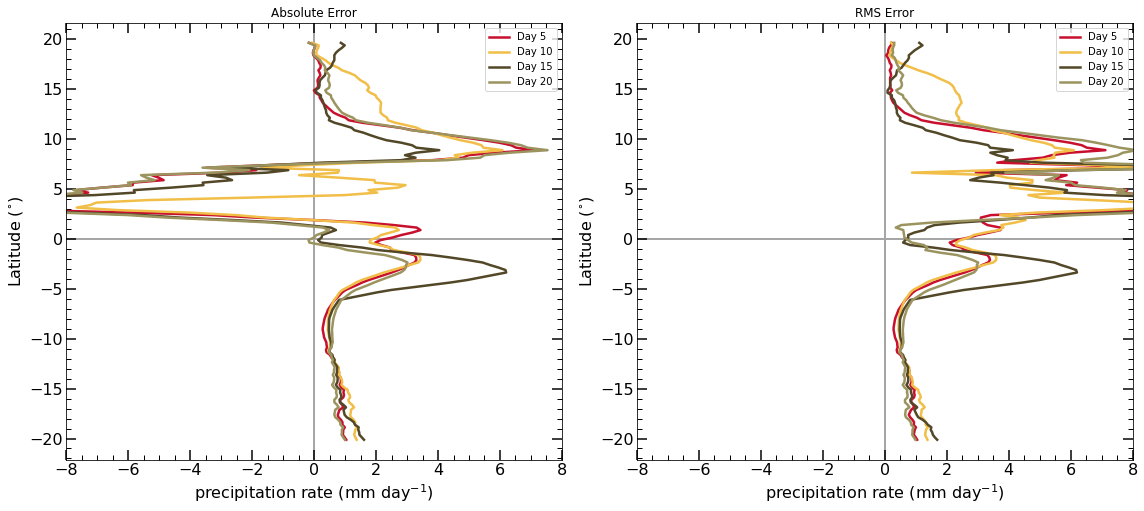

In [4]:
npan = 2 # number of panels
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(16, 7.2), tight_layout='true') #plot the figure and apply some asthetic constraints
print("The Error between Hindcast(s) and Observation (NASA TRMM) for Day "+str(dayOfTheSeason)+" and a "+str(numDayAvg)+" Day Average\n")

for j in range(0,npan,1): # Each iteration creates a new subplot
    # Setup the plot
    ax1 = fig.add_subplot(1,npan,j+1)
    plt.minorticks_on()
    ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', top='True')
    ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', top='True')
    ax1.tick_params(axis='x', labelsize=16)
    ax1.tick_params(axis='y', labelsize=16)
    plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
    plt.axvline(0, color='0.65', linewidth = 2.0, zorder=-2)
    
    if j == 0: # First subplot (absolute error)

        # First, increase the latitude range so that endpoints are not lost due to interpolation and repack the userInputs list
        lats_mod = lats-1
        latn_mod = latn+1
        userInputs_mod = [dayOfTheSeason,lats_mod,latn_mod,lonw,lone]
        
        for ii,DayXX in enumerate(DayXXHcast): # Each iteration creates a new hindcast line plot on the graph 

            # Rerun PRECTAlignDatasets to reflect changed latitude range
            precip_aligned, precip_aligned_obs, lat_plt, lat_plt_obs, id_DayOfTheSeason = PRECTAlignDatasets(timeDayXX[DayXX], lat, lon, precipDayXX[DayXX], rootgrp_obs, userInputs_mod)
            
            # Time average (axis=0) the precip data over the user specified numDayAvg period ([id_DayOfTheSeason:id_DayOfTheSeason+numDayAvg])
            precip_avg     = np.mean(precip_aligned[id_DayOfTheSeason : id_DayOfTheSeason+numDayAvg],    axis=0)
            precip_avg_obs = np.mean(precip_aligned_obs[id_DayOfTheSeason : id_DayOfTheSeason+numDayAvg],axis=0)
            
            # Take an average of all lon values at each lat value (axis=1). Changes matrix size
            precip_lonavg_mps = np.mean(precip_avg,    axis=1)
            precip_lonavg_obs = np.mean(precip_avg_obs,axis=1)
            
            # Change units from m/s to mm/day
            precip_lonavg = precip_lonavg_mps*1000*86400
            
            # Interpolate the hindcast dataset to match the size and spacial grid of the observation dataset
            precip_lonavg_interp, precip_lonavg_obs, lat_plt_obs = PRECTInterpolateDataset(precip_lonavg,precip_lonavg_obs,lat_plt,lat_plt_obs,lats,latn)
            
            # Find the absolute error between the interpolated hindcast and the observation precip
            precipAbsErr = precip_lonavg_interp - precip_lonavg_obs
            
            # Plot the absolute error precip
            p1 = plt.plot(precipAbsErr, lat_plt_obs, color = plotColors[ii], linewidth = 2.5, label = 'Day '+str(DayXX))
            
        # Set plot settings
        plt.ylabel('Latitude $(^{\circ})$', fontsize=16)
        plt.xlabel('precipitation rate (mm day$^{-1}$)', fontsize=16)
        plt.title("Absolute Error")
        plt.xlim([-8,8])
        plt.legend()
        
    elif j == 1: # Second subplot (RMS error)
        
        # First, increase the latitude range so that endpoints are not lost due to interpolation
        lats_mod = lats-1
        latn_mod = latn+1
        
        for ii,DayXX in enumerate(DayXXHcast): # Each iteration creates a new hindcast line plot on the graph
            
            # Initialize the variables to contain the cumulative precipitation error over several days
            precip_errSqr_tot = np.zeros(precip_lonavg_interp.shape)
            
            for kk in range(numDayAvg): # Each iteration cumulates the precipitation error for each day
    
                # Repack the userInputs and update dayOfTheSeason on each loop iteration (to find the precip for the days in the numDayAvg period)
                userInputs_mod = [dayOfTheSeason+kk,lats_mod,latn_mod,lonw,lone]

                # Rerun PRECTAlignDatasets to reflect changed latitude range
                precip_aligned, precip_aligned_obs, lat_plt, lat_plt_obs, id_DayOfTheSeason = PRECTAlignDatasets(timeDayXX[DayXX], lat, lon, precipDayXX[DayXX], rootgrp_obs, userInputs_mod)

                # Take an average of all lon values at each lat value (axis=1). Changes matrix size
                precip_lonavg_mps = np.mean(precip_aligned[id_DayOfTheSeason],    axis=1)
                precip_lonavg_obs = np.mean(precip_aligned_obs[id_DayOfTheSeason],axis=1)

                # Change units from m/s to mm/day
                precip_lonavg = precip_lonavg_mps*1000*86400 
                
                # Interpolate the hindcast dataset to match the size and spatial grid of the observation dataset
                precip_lonavg_interp, precip_lonavg_obs, lat_plt_obs = PRECTInterpolateDataset(precip_lonavg,precip_lonavg_obs,lat_plt,lat_plt_obs,lats,latn)
                
                # Square the difference between the interpolated hindcast data and the observation data
                precipErrSqr = np.square(precip_lonavg_interp - precip_lonavg_obs)
                
                # Sum the squared differences and store this in the total precip error variable
                precip_errSqr_tot = precip_errSqr_tot + precipErrSqr
            
            # Divide the summed, squared differences by the value of numDayAvg and then take the square root to obtain the precip RMS error
            precipRMS = np.sqrt(precip_errSqr_tot/numDayAvg)             
            
            # Once the RMS error has been calculated, plot the error data            
            p2 = plt.plot(precipRMS, lat_plt_obs, color = plotColors[ii], linewidth = 2.5, label = 'Day '+str(DayXX))
            
        plt.ylabel('Latitude $(^{\circ})$', fontsize=16)
        plt.xlabel('precipitation rate (mm day$^{-1}$)', fontsize=16)
        plt.title("RMS Error")
        plt.xlim([-8,8])
        plt.legend()
        